In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Loading Dataset

In [2]:
csvpath = "../csv/insurance.csv"

In [3]:
dataset = pd.read_csv(csvpath)

In [4]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dataset.shape

(1338, 7)

In [6]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Check Null Values In Dataset

In [8]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Covert Columns From String['sex', 'smoker', 'region'] To Numerical Values

In [9]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [11]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
dataset['sex'] = dataset['sex'].map({'female':0, 'male':1})

In [13]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
dataset['smoker'] = dataset['smoker'].map({'yes':0, 'no':1})

In [15]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520


In [16]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
dataset['region'] = dataset['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast': 3})

In [18]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


Exploratory Data Analysis

C:\Users\sandh\AppData\Local\Temp\ipykernel_9816\955558404.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'])


<Axes: xlabel='age', ylabel='Density'>

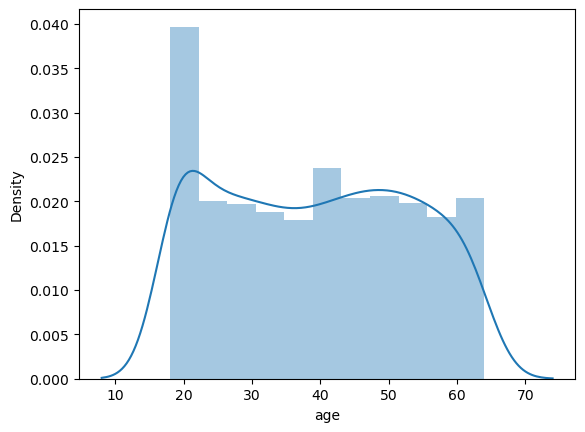

In [19]:
sns.distplot(dataset['age'])

C:\Users\sandh\AppData\Local\Temp\ipykernel_9816\557843666.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['sex'])


<Axes: xlabel='sex', ylabel='Density'>

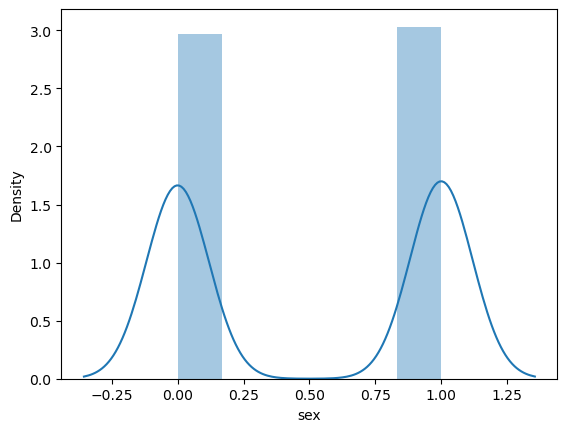

In [20]:
sns.distplot(dataset['sex'])

C:\Users\sandh\AppData\Local\Temp\ipykernel_9816\557843666.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['sex'])


<Axes: xlabel='sex', ylabel='Density'>

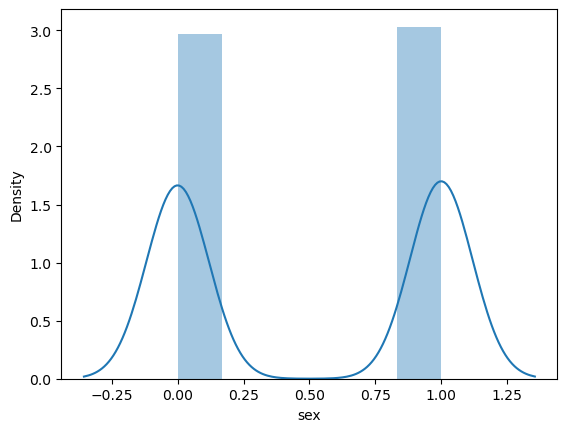

In [21]:
sns.distplot(dataset['sex'])

Store Feature Matrix in X and Response (target) In Vector y

In [22]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [23]:
X = dataset.drop(['charges'], axis = 1)

In [24]:
y = dataset['charges']

In [25]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Train/Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

Import The Models

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
lr =  LinearRegression()
lr.fit(X_train, y_train)
svm =  SVR()
svm.fit(X_train, y_train)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

Prediction on Test Data

In [31]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test, 'lr':y_pred1, 'svm':y_pred2, 'rf':y_pred3, 'gr':y_pred4})

In [32]:
df1

,Actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.340804,10487.019812,11001.128629
887,5272.17580,7116.295018,9492.758696,5144.879336,5840.174656
890,29330.98315,36909.013521,9648.606829,28290.039068,28001.980112
1293,9301.89355,9507.874691,9555.103129,10036.134865,9745.291602
259,33750.29180,27013.350008,9420.768462,34608.793175,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.743773,46810.735530,45431.423211
575,12222.89830,11814.555568,9625.305132,12411.066904,12465.025294
535,6067.12675,7638.107736,9504.378670,6356.568984,6974.336525
543,63770.42801,40959.081722,9604.955520,46700.140325,47862.047791


Compare Performance Visually

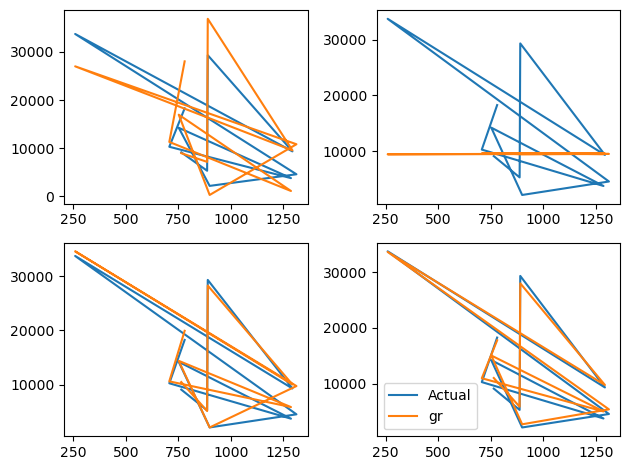

In [33]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['lr'].iloc[0:11], label = 'lr')

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['svm'].iloc[0:11], label = 'svm')

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['rf'].iloc[0:11], label = 'rf')

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['gr'].iloc[0:11], label = 'gr')

plt.tight_layout()

plt.legend()
        

Evaluating the Algorithm

In [34]:
from sklearn import metrics

In [35]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

In [36]:
print(score1, score2, score3, score4)

0.7833463107364538 -0.07230117560847282 0.8600539624430937 0.8779726251291786


In [37]:
s1 = metrics.mean_absolute_error(y_test, y_pred1)
s2 = metrics.mean_absolute_error(y_test, y_pred2)
s3 = metrics.mean_absolute_error(y_test, y_pred3)
s4 = metrics.mean_absolute_error(y_test, y_pred4)

In [38]:
print(s1, s2, s3, s4)

4186.5088983664355 8592.550593461085 2504.080534190797 2447.9515580545844


Predict Charge For New Costomer

In [ ]:
age 	sex 	bmi 	children 	smoker 	region 	charges
1 	18 	1 	33.770 	1 	1 	1 	1725.55230


In [62]:
data = {'age':40,
        'sex':1,
        'bmi':40.20,
        'children':1,
        'smoker':1,
        'region':2}
       
df = pd.DataFrame(data, index = [0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.2,1,1,2


In [63]:
new_pred = gr.predict(df)
print(new_pred)

[8339.2691772]


Save Model Using joblib

In [41]:
gr = GradientBoostingRegressor()
gr.fit(X, y)

GradientBoostingRegressor()

In [42]:
import joblib

In [46]:
joblib.dump(gr, 'model_joblib_gr')

['model_joblib_gr']

In [47]:
model = joblib.load('model_joblib_gr')

In [65]:
model.predict(df)

array([8339.2691772])

GUI